In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('iris.csv')
print (data)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [3]:
print(data.head(10))

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
5           5.4          3.9           1.7          0.4  Setosa
6           4.6          3.4           1.4          0.3  Setosa
7           5.0          3.4           1.5          0.2  Setosa
8           4.4          2.9           1.4          0.2  Setosa
9           4.9          3.1           1.5          0.1  Setosa


In [4]:
print(data.tail(10))

     sepal.length  sepal.width  petal.length  petal.width    variety
140           6.7          3.1           5.6          2.4  Virginica
141           6.9          3.1           5.1          2.3  Virginica
142           5.8          2.7           5.1          1.9  Virginica
143           6.8          3.2           5.9          2.3  Virginica
144           6.7          3.3           5.7          2.5  Virginica
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica


In [5]:
print(data.shape)

(150, 5)


In [10]:
new_data = data.dropna()
print(new_data)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [12]:
data.duplicated().any()
data.drop_duplicates(inplace=True)
print(data)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[149 rows x 5 columns]


In [13]:
x=data.iloc[:,:4].values
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [14]:
y=data.iloc[:,4].values
print(y)

['Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'V

In [15]:
le = LabelEncoder()
y_new = le.fit_transform(y)
print(y_new)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y_new,test_size=.25,random_state=45)
print(y_train)

[1 0 0 1 0 1 1 0 2 1 2 0 0 1 2 0 2 0 0 1 0 1 1 2 1 2 0 0 0 0 1 0 1 2 1 1 1
 0 0 1 0 1 1 2 1 1 1 2 1 0 1 1 1 2 1 2 1 1 2 2 2 0 0 1 2 2 2 0 1 2 1 1 1 0
 2 2 0 0 2 0 2 1 1 2 2 1 0 0 2 0 1 2 2 0 0 0 2 0 0 2 1 1 1 0 2 2 1 1 0 2 2]


In [17]:
print(x_train)

[[6.4 2.9 4.3 1.3]
 [4.8 3.1 1.6 0.2]
 [5.5 4.2 1.4 0.2]
 [5.8 2.7 3.9 1.2]
 [4.9 3.  1.4 0.2]
 [6.9 3.1 4.9 1.5]
 [5.8 2.6 4.  1.2]
 [5.1 3.7 1.5 0.4]
 [7.4 2.8 6.1 1.9]
 [6.  2.2 4.  1. ]
 [7.3 2.9 6.3 1.8]
 [4.9 3.6 1.4 0.1]
 [4.8 3.  1.4 0.3]
 [5.6 3.  4.5 1.5]
 [6.1 3.  4.9 1.8]
 [5.3 3.7 1.5 0.2]
 [6.8 3.2 5.9 2.3]
 [5.1 3.8 1.5 0.3]
 [4.7 3.2 1.6 0.2]
 [5.  2.3 3.3 1. ]
 [4.6 3.2 1.4 0.2]
 [5.5 2.5 4.  1.3]
 [6.3 2.5 4.9 1.5]
 [7.7 3.8 6.7 2.2]
 [5.6 2.5 3.9 1.1]
 [6.7 3.1 5.6 2.4]
 [4.7 3.2 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [4.5 2.3 1.3 0.3]
 [5.1 3.3 1.7 0.5]
 [6.1 2.8 4.  1.3]
 [5.  3.4 1.5 0.2]
 [7.  3.2 4.7 1.4]
 [6.3 2.7 4.9 1.8]
 [5.5 2.4 3.8 1.1]
 [6.1 2.8 4.7 1.2]
 [5.7 2.9 4.2 1.3]
 [4.9 3.1 1.5 0.1]
 [5.4 3.4 1.7 0.2]
 [6.  2.7 5.1 1.6]
 [5.7 3.8 1.7 0.3]
 [6.  2.9 4.5 1.5]
 [5.7 2.8 4.1 1.3]
 [6.7 3.3 5.7 2.5]
 [5.6 2.7 4.2 1.3]
 [5.6 3.  4.1 1.3]
 [5.8 2.7 4.1 1. ]
 [6.  2.2 5.  1.5]
 [5.5 2.4 3.7 1. ]
 [5.4 3.9 1.7 0.4]
 [5.7 2.8 4.5 1.3]
 [5.2 2.7 3.9 1.4]
 [6.2 2.9 4.

In [18]:
print(y_train)

[1 0 0 1 0 1 1 0 2 1 2 0 0 1 2 0 2 0 0 1 0 1 1 2 1 2 0 0 0 0 1 0 1 2 1 1 1
 0 0 1 0 1 1 2 1 1 1 2 1 0 1 1 1 2 1 2 1 1 2 2 2 0 0 1 2 2 2 0 1 2 1 1 1 0
 2 2 0 0 2 0 2 1 1 2 2 1 0 0 2 0 1 2 2 0 0 0 2 0 0 2 1 1 1 0 2 2 1 1 0 2 2]


In [19]:
print(x_test)

[[5.1 3.5 1.4 0.2]
 [5.  3.5 1.6 0.6]
 [6.4 2.8 5.6 2.1]
 [4.6 3.1 1.5 0.2]
 [4.9 3.1 1.5 0.2]
 [5.1 3.8 1.9 0.4]
 [4.4 3.  1.3 0.2]
 [5.7 2.5 5.  2. ]
 [7.7 2.8 6.7 2. ]
 [6.9 3.1 5.4 2.1]
 [5.2 3.4 1.4 0.2]
 [6.1 2.6 5.6 1.4]
 [6.8 3.  5.5 2.1]
 [7.1 3.  5.9 2.1]
 [6.4 2.8 5.6 2.2]
 [5.  3.2 1.2 0.2]
 [6.7 3.  5.2 2.3]
 [6.9 3.1 5.1 2.3]
 [5.  3.5 1.3 0.3]
 [6.3 2.3 4.4 1.3]
 [5.4 3.  4.5 1.5]
 [6.  3.4 4.5 1.6]
 [5.8 2.8 5.1 2.4]
 [6.4 3.2 4.5 1.5]
 [5.  3.6 1.4 0.2]
 [6.4 2.7 5.3 1.9]
 [6.1 3.  4.6 1.4]
 [5.6 2.9 3.6 1.3]
 [5.4 3.7 1.5 0.2]
 [5.5 2.6 4.4 1.2]
 [6.8 2.8 4.8 1.4]
 [6.3 2.9 5.6 1.8]
 [6.4 3.1 5.5 1.8]
 [6.3 3.3 6.  2.5]
 [5.  3.  1.6 0.2]
 [6.3 3.4 5.6 2.4]
 [4.3 3.  1.1 0.1]
 [5.  3.4 1.6 0.4]]


In [20]:
print(y_test)

[0 0 2 0 0 0 0 2 2 2 0 2 2 2 2 0 2 2 0 1 1 1 2 1 0 2 1 1 0 1 1 2 2 2 0 2 0
 0]


In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
print("-----------------------Test Class-----------------\n",y_test)
print("\n---------------------------Predict Class-----------\n",y_predict)


-----------------------Test Class-----------------
 [0 0 2 0 0 0 0 2 2 2 0 2 2 2 2 0 2 2 0 1 1 1 2 1 0 2 1 1 0 1 1 2 2 2 0 2 0
 0]

---------------------------Predict Class-----------
 [0 0 2 0 0 0 0 2 2 2 0 2 2 2 2 0 2 2 0 1 1 1 2 1 0 2 1 1 0 1 1 2 2 2 0 2 0
 0]


In [22]:
print(knn.predict_proba(x_test))


[[1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.2 0.8]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  0.4 0.6]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  0.8 0.2]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [1.  0.  0. ]]


In [23]:
print(accuracy_score(y_test,y_predict,normalize=False))

38


In [24]:
cm = confusion_matrix(y_test,y_predict,normalize = None,labels=knn.classes_)
print(cm)


[[14  0  0]
 [ 0  8  0]
 [ 0  0 16]]


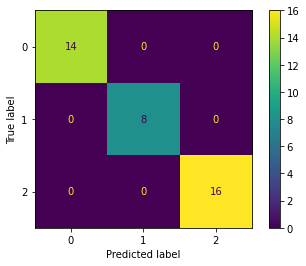

In [25]:
cm_dis = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
cm_dis.plot()
plt.show()